<a href="https://colab.research.google.com/github/dudaholandah/NLP/blob/main/Projeto/Word2Vec_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!cp -r '/content/drive/MyDrive/Datasets/cuisine-classification-ingredients' 'cuisine-classification-ingredients'

In [3]:
!cp -r '/content/drive/MyDrive/Datasets/indian-food' 'indian-food'

# Imports

In [1]:
!pip install gensim --upgrade
!pip install keras
!pip install tensorflow
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#WORD2VEC
from gensim.models import Word2Vec
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')
#Neural Network
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Embedding,GlobalMaxPooling1D,MaxPooling1D,Activation,Flatten,SimpleRNN,Dropout,Input
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras_tuner import HyperModel
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#Data
import json
import os
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data

## Download

### Cuisine Classification Data

In [3]:
path = 'cuisine-classification-ingredients/train.json'

with open(path, 'r') as f:
  json_file = json.load(f)

In [4]:
df_cuisine = pd.DataFrame(json_file, columns=['id', 'cuisine', 'ingredients'])

In [5]:
df_cuisine = df_cuisine.drop(['id'], axis=1)

In [6]:
df_cuisine = df_cuisine[:1000]

In [7]:
df_cuisine.head(5)

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Indian Food Data

In [8]:
path = 'indian-food/indian_food.csv'
df_indian = pd.read_csv(path)

In [9]:
df_indian.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Pre-Processing

In [10]:
def pre_processing(text):
  new = ""
  for word in text.split(','):
    word = re.sub(r'[^\w\s]', '', word.lower())
    word = re.sub(r'[0-9]+', '', word)
    word = re.sub(r'\boz\b', '', word)
    word = re.sub(r'\ba taste of\b', '', word)
    new = new + word.strip() + " "

  return new[:-1]

### Cuisine Classification Data

In [11]:
df_cuisine['ingredients'] = [','.join(x).strip() for x in df_cuisine['ingredients']]

In [12]:
df_cuisine['ingredients'] = [pre_processing(x) for x in df_cuisine['ingredients']]

In [13]:
X = df_cuisine['ingredients']
y = df_cuisine['cuisine']

# dados de teste = 20% do treinamento
X_train_cuisine, X_test_cuisine, y_train_cuisine, y_test_cuisine = train_test_split(X, y, test_size=0.2)

# dados de validacao = 50% do teste
X_test_cuisine, X_valid_cuisine, y_test_cuisine, y_valid_cuisine = train_test_split(X, y, test_size=0.5)

In [14]:
y_train_cuisine = pd.Categorical(y_train_cuisine)
y_train_int_cuisine = y_train_cuisine.codes

y_valid_cuisine = pd.Categorical(y_valid_cuisine)
y_valid_int_cuisine = y_valid_cuisine.codes

y_test_cuisine = pd.Categorical(y_test_cuisine)
target_names_cuisine = y_test_cuisine.categories
y_test_int_cuisine = y_test_cuisine.codes

y_train_cuisine = to_categorical(y_train_int_cuisine)
y_valid_cuisine = to_categorical(y_valid_int_cuisine)
y_test_cuisine = to_categorical(y_test_int_cuisine)

### Indian Food Data

In [15]:
df_indian['ingredients'] = [pre_processing(x) for x in df_indian['ingredients']]

In [16]:
X = df_indian['ingredients']
y = df_indian['diet']

# dados de teste = 20% do treinamento
X_train_indian, X_test_indian, y_train_indian, y_test_indian = train_test_split(X, y, test_size=0.2)

# dados de validacao = 50% do teste
X_test_indian, X_valid_indian, y_test_indian, y_valid_indian = train_test_split(X, y, test_size=0.5)

In [17]:
y_train_indian = pd.Categorical(y_train_indian)
y_train_int_indian = y_train_indian.codes

y_valid_indian = pd.Categorical(y_valid_indian)
y_valid_int_indian = y_valid_indian.codes

y_test_indian = pd.Categorical(y_test_indian)
target_names_indian = y_test_indian.categories
y_test_int_indian = y_test_indian.codes

y_train_indian = to_categorical(y_train_int_indian)
y_valid_indian = to_categorical(y_valid_int_indian)
y_test_indian = to_categorical(y_test_int_indian)

# Word2Vec

In [90]:
def create_embedding_matrix(tokenizer, model, vocab_size):
  embedding_matrix = np.zeros((vocab_size, 50))
  for word, i in tokenizer.word_index.items():
    if word in model.wv:
      embedding_matrix[i] = model.wv.get_vector(word)
    else:
      embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), 50)
  return embedding_matrix

### Cuisine Classification Data

In [37]:
EMBEDDING_DIM = 50
MAX_LENGTH_C = 50

In [20]:
# Train Data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_cuisine)
encoded_cuisine = tokenizer.texts_to_sequences(X_train_cuisine)
X_train_cuisine_padded = pad_sequences(encoded_cuisine, maxlen=MAX_LENGTH_C, padding='post', truncating='post')

vocab_size_cuisine = len(tokenizer.word_index) + 1

In [21]:
# EMBEDDING LAYER

ingredients = '. '.join(X_train_cuisine)
sentences = nltk.sent_tokenize(ingredients)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_DIM, min_count=1, window=5, sg=1,workers=4)

embedding_matrix_cuisine = create_embedding_matrix(tokenizer, model_word2vec, vocab_size_cuisine)

In [22]:
# Valid Data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_valid_cuisine)
encoded_cuisine = tokenizer.texts_to_sequences(X_valid_cuisine)
X_valid_cuisine_padded = pad_sequences(encoded_cuisine, maxlen=MAX_LENGTH_C, padding='post', truncating='post')

In [23]:
# Test Data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test_cuisine)
encoded_cuisine = tokenizer.texts_to_sequences(X_test_cuisine)
X_test_cuisine_padded = pad_sequences(encoded_cuisine, maxlen=MAX_LENGTH_C, padding='post', truncating='post')

### Indian Food Data

In [91]:
EMBEDDING_DIM = 50
MAX_LENGTH_I = 12

In [92]:
# Train Data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_indian)
encoded_indian = tokenizer.texts_to_sequences(X_train_indian)
vocab_size_indian = len(tokenizer.word_index) + 1
X_train_indian_padded = pad_sequences(encoded_indian, maxlen=MAX_LENGTH_I, padding='post', truncating='post')

In [93]:
# EMBEDDING LAYER

ingredients = '. '.join(X_train_indian)
sentences = nltk.sent_tokenize(ingredients)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, vector_size=50, min_count=1, window=5, sg=1,workers=4)

embedding_matrix_indian = create_embedding_matrix(tokenizer, model_word2vec, vocab_size_indian)

In [94]:
# Validation Data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_valid_indian)
encoded_indian = tokenizer.texts_to_sequences(X_valid_indian)
X_valid_indian_padded = pad_sequences(encoded_indian, maxlen=MAX_LENGTH_I, padding='post', truncating='post')

In [95]:
# Test Data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test_indian)
encoded_indian = tokenizer.texts_to_sequences(X_test_indian)
X_test_indian_padded = pad_sequences(encoded_indian, maxlen=MAX_LENGTH_I, padding='post', truncating='post')

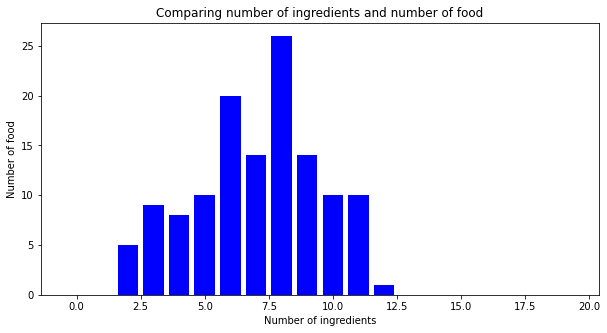

In [96]:
max_ingredients = 20

hist = {}

hist['qtde'] = [x for x in range(0,max_ingredients)]

lista = [0]*(max_ingredients)
for x in encoded_indian:
    lista[len(x)]+=1

hist['num food'] = lista
fig = plt.figure(figsize = (10, 5))
 
plt.bar(hist['qtde'],hist['num food'],
        color ='blue')
 
plt.xlabel("Number of ingredients")
plt.ylabel("Number of food")
plt.title("Comparing number of ingredients and number of food")
plt.show()

# CNN

In [66]:
class CNNHyperModel(HyperModel):
  def __init__(self, embedding_layer, output):
    self.embedding_layer = embedding_layer
    self.output = output

  def build(self, hp):
    model = Sequential()
    model.add(self.embedding_layer)
    model.add(Conv1D(32, kernel_size=11, strides=1))
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(self.output, activation='softmax'))
    sgd = SGD(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
    return model

### Cuisine Classification Data

In [67]:
embedding_layer = Embedding(vocab_size_cuisine, EMBEDDING_DIM, weights=[embedding_matrix_cuisine], input_length=MAX_LENGTH_C, trainable=False)

In [68]:
model_CNN = CNNHyperModel(embedding_layer, 20)

In [69]:
model_cuisine = model_CNN.build(0)

In [70]:
model_cuisine.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 50)            55600     
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 32)            17632     
                                                                 
 activation_12 (Activation)  (None, 40, 32)            0         
                                                                 
 global_max_pooling1d_4 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               4224      
                                                                 
 activation_13 (Activation)  (None, 128)               0         
                                                      

In [71]:
history_fine = model_cuisine.fit(X_train_cuisine_padded,y_train_cuisine,validation_data=(X_valid_cuisine_padded,y_valid_cuisine), epochs=50) 

Epoch 1/50
25/25 [==============================] - 1s 18ms/step - loss: 2.9637 - accuracy: 0.0775 - val_loss: 2.9578 - val_accuracy: 0.0800
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 2.9565 - accuracy: 0.0775 - val_loss: 2.9510 - val_accuracy: 0.0800
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 2.9494 - accuracy: 0.0775 - val_loss: 2.9441 - val_accuracy: 0.0800
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 2.9421 - accuracy: 0.0800 - val_loss: 2.9371 - val_accuracy: 0.0840
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 2.9347 - accuracy: 0.1075 - val_loss: 2.9301 - val_accuracy: 0.1040
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 2.9272 - accuracy: 0.1675 - val_loss: 2.9230 - val_accuracy: 0.2020
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 2.9198 - accuracy: 0.2262 - val_loss: 2.9161 - val_accuracy: 0.2400
Epoch 8/50
25

In [72]:
target_names = pd.Categorical(df_cuisine['cuisine']).categories

In [73]:
y_prob = model_cuisine.predict(X_test_cuisine_padded)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred, target_names=target_names))

              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00         4
     british       0.00      0.00      0.00         6
cajun_creole       0.00      0.00      0.00        18
     chinese       0.00      0.00      0.00        32
    filipino       0.00      0.00      0.00         7
      french       0.00      0.00      0.00        34
       greek       0.00      0.00      0.00        14
      indian       0.00      0.00      0.00        36
       irish       0.00      0.00      0.00        11
     italian       0.18      0.99      0.31        92
    jamaican       0.00      0.00      0.00         5
    japanese       0.00      0.00      0.00        17
      korean       0.00      0.00      0.00        19
     mexican       0.50      0.01      0.02        98
    moroccan       0.00      0.00      0.00        13
     russian       0.00      0.00      0.00         5
 southern_us       0.00      0.00      0.00        53
     spanish       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Indian Food Data

In [97]:
embedding_layer = Embedding(vocab_size_indian, EMBEDDING_DIM, weights=[embedding_matrix_indian], input_length=MAX_LENGTH_I, trainable=False)

In [98]:
model_CNN = CNNHyperModel(embedding_layer, 2)

In [99]:
model_indian = model_CNN.build(0)

In [101]:
model_indian.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 12, 50)            15650     
                                                                 
 conv1d_4 (Conv1D)           (None, 2, 32)             17632     
                                                                 
 activation_15 (Activation)  (None, 2, 32)             0         
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 128)               4224      
                                                                 
 activation_16 (Activation)  (None, 128)               0         
                                                     

In [102]:
history_fine = model_indian.fit(X_train_indian_padded,y_train_indian,validation_data=(X_valid_indian_padded,y_valid_indian), epochs=50) 

Epoch 1/50
7/7 [==============================] - 1s 36ms/step - loss: 0.6910 - accuracy: 0.7353 - val_loss: 0.6877 - val_accuracy: 0.8672
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6856 - accuracy: 0.8824 - val_loss: 0.6828 - val_accuracy: 0.8750
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6805 - accuracy: 0.8824 - val_loss: 0.6778 - val_accuracy: 0.8750
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6755 - accuracy: 0.8824 - val_loss: 0.6731 - val_accuracy: 0.8750
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6707 - accuracy: 0.8824 - val_loss: 0.6684 - val_accuracy: 0.8750
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6658 - accuracy: 0.8824 - val_loss: 0.6636 - val_accuracy: 0.8750
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6610 - accuracy: 0.8824 - val_loss: 0.6590 - val_accuracy: 0.8750
Epoch 8/50
7/7 [================

In [103]:
target_names = pd.Categorical(df_indian['diet']).categories

In [104]:
y_prob = model_indian.predict(X_test_indian_padded)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred, target_names=target_names))

                precision    recall  f1-score   support

non vegetarian       0.00      0.00      0.00        13
    vegetarian       0.90      1.00      0.95       114

      accuracy                           0.90       127
     macro avg       0.45      0.50      0.47       127
  weighted avg       0.81      0.90      0.85       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
